In [7]:
import os
import numpy as np
import shutil
import random
root_dir = 'Dataset_BUSI_with_GT'
classes_dir = ['benign', 'malignant','normal']

test_ratio = 0.20

for cls in classes_dir:
    os.makedirs('breast_data' +'train/' + cls)
    os.makedirs('breast_data' +'test/' + cls)

src = 'D:/datagen/Dataset_BUSI_with_GT/' + cls

allFileNames = os.listdir(src)
np.random.shuffle(allFileNames)
train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                          [int(len(allFileNames)* (1 - test_ratio))])


train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]

print("*****************************")
print('Total images: ', len(allFileNames))
print('Training: ', len(train_FileNames))
print('Testing: ', len(test_FileNames))
print("*****************************")


lab = ['benign', 'malignant','normal']

for name in train_FileNames:
    for i in lab:
        shutil.copy(name, root_dir +'train/' + i)

for name in test_FileNames:
    for i in lab:
        shutil.copy(name, root_dir +'test/' + i)
print("Copying Done!")

*****************************
Total images:  266
Training:  212
Testing:  54
*****************************


FileNotFoundError: [Errno 2] No such file or directory: 'Dataset_BUSI_with_GTtrain/benign'

In [14]:
!python run.py --data_path=D:\datagen\Dataset_BUSI_with_GT --test_data_path_to_save=D:\datagen\Data_Breast --train_ratio=0.7

In [2]:
!pip install split_folders


In [11]:
import os, re, os.path
pattern = "mask"
mypath = "D:\datagen\Dataset_BUSI_with_GT"
for root, dirs, files in os.walk(mypath):
    for file in filter(lambda x: re.search(pattern, x), files):
        os.remove(os.path.join(root, file))

In [ ]:
import os, re, os.path
pattern = "mask"
mypath = "D:\datagen\Dataset_BUSI_with_GT"
for root, dirs, files in os.walk(mypath):
    for file in filter(lambda x: re.search(pattern, x), files):
        os.remove(os.path.join(root, file))

In [19]:

import splitfolders # or import splitfolders
input_folder = "D:\datagen\Dataset_BUSI_with_GT"
output = "D:\datagen\Breast_cancer_gmm" #where you want the split datasets saved. one will be created if it does not exist or none is set

splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .2)) # ratio of split are in order of train/val/test. You can change to whatever you want. For train/val sets only, you could do .75, .25 for example.

Copying files: 798 files [00:00, 1333.47 files/s]


In [17]:
import os, re, os.path
pattern = "mask"
mypath = "D:\datagen\Dataset_BUSI_with_GT"
for root, dirs, files in os.walk(mypath):
    for file in files:
        if file not in filter(lambda x: re.search(pattern, x), files):
            os.remove(os.path.join(root, file))

In [1]:
# This approach comes from SMOTE: Synthetic Minority Over-sampling Technique
# by N. V. Chawla, K. W. Bowyer, L. O. Hall and W. P. Kegelmeyer. To read the
# paper, please go to: https://arxiv.org/pdf/1106.1813.pdf

from sklearn.neighbors import NearestNeighbors
import random


class Smote:
    """
    Implement SMOTE, synthetic minority oversampling technique.
    Parameters
    -----------
    sample      2D (numpy)array
                minority class samples
    N           Integer
                amount of SMOTE N%
    k           Integer
                number of nearest neighbors k
                k <= number of minority class samples
    Attributes
    ----------
    newIndex    Integer
                keep a count of number of synthetic samples
                initialize as 0
    synthetic   2D array
                array for synthetic samples
    neighbors   K-Nearest Neighbors model
    """
    def __init__(self, sample, N, k):
        self.sample = sample
        self.k = k
        self.T = len(self.sample)
        self.N = N
        self.newIndex = 0
        self.synthetic = []
        self.neighbors = NearestNeighbors(n_neighbors=self.k).fit(self.sample)

    def over_sampling(self):
        if self.N < 100:
            self.T = (self.N / 100) * self.T
            self.N = 100
        self.N = int(self.N / 100)

        for i in range(0, self.T):
            nn_array = self.compute_k_nearest(i)
            self.populate(self.N, i, nn_array)

    def compute_k_nearest(self, i):
        nn_array = self.neighbors.kneighbors([self.sample[i]], self.k, return_distance=False)
        if len(nn_array) == 1:
            return nn_array[0]
        else:
            return []

    def populate(self, N, i, nn_array):
        while N != 0:
            nn = random.randint(0, self.k - 1)
            self.synthetic.append([])
            for attr in range(0, len(self.sample[i])):
                if self.sample[nn_array[nn]][attr] > self.sample[i][attr]:
                    dif = self.sample[nn_array[nn]][attr] - self.sample[i][attr]
                else:
                    dif = self.sample[i][attr] - self.sample[nn_array[nn]][attr]
                gap = random.random()
                self.synthetic[self.newIndex].append(self.sample[i][attr] + gap * dif)
            self.newIndex += 1
            N -= 1

In [ ]:
test_set="/content/drive/MyDrive/Project/melanoma_cancer_dataset/test"
train_set="/content/drive/MyDrive/Project/melanoma_cancer_dataset/train"

In [8]:
import numpy as np

X = np.array([[1, 0.7], [0.95, 0.76], [0.98, 0.85], [0.95, 0.78], [1.12, 0.81]])
s = Smote(sample=X, N=300, k=3)
s.over_sampling()
print(s.synthetic)

[[1.0, 0.7], [0.9626748473459419, 0.7130544071607376], [0.9677788975581967, 0.7248037737997436], [0.9945813979252291, 0.7307553302074437], [0.95, 0.76], [0.9522224623881269, 0.7398910375959789], [0.9604029562163554, 0.8111278840509075], [0.98, 0.85], [0.9742640325098076, 0.7891215969255089], [0.95, 0.78], [0.95, 0.78], [0.9574780471487881, 0.8207473032683892], [1.1115871161273978, 0.7303175925875889], [1.12, 0.81], [1.0512719716519994, 0.7126785785513003]]


In [ ]:
import matplotlib.pyplot as plt

img = plt.imread('orig.png')
rows,cols,colors = img.shape # gives dimensions for RGB array
img_size = rows*cols*colors
img_1D_vector = img.reshape(img_size)
# you can recover the orginal image with:
img2 = img_1D_vector.reshape(rows,cols,colors)

In [9]:
pwd

'd:\\datagen'

In [2]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

total="D:\\datagen\\test\\"
Files= os.listdir(total)
app=[]
for im in Files:
    file_main= total + "\\" + im
    img = cv2.imread(file_main)
    img = cv2.resize(img, (224,224))
    arr=np.array(img)
    arr=arr.flatten()
    app.append(arr)

In [32]:
len(s.synthetic)

30

In [3]:
s = Smote(sample=app, N=300, k=3)
s.over_sampling()


In [5]:
out=[]
for ig in s.synthetic:
    for i in range(len(ig)):
        ig[i]=int(ig[i])
    ig=np.array(ig).reshape(224,224,3)
    out.append(ig)


In [8]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

path="D:\\datagen\\output\\"

for i in range(len(out)):
    tmp=str(i)+".jpg"
    cv2.imwrite(os.path.join(path,tmp),out[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


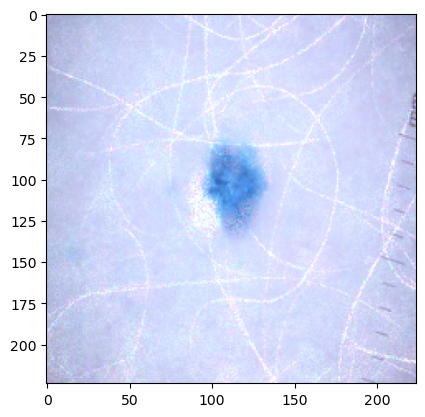

In [7]:
import matplotlib.pyplot as plt

plt.imshow(out[2])
plt.show()

In [2]:
pip install opencv-python


     ---------------------------------------- 38.2/38.2 MB 1.5 MB/s eta 0:00:00


In [1]:

total="D:\\datagen\\melanoma_cancer_dataset\\train\\benign\\melanoma_0.jpg"
import cv2
image=cv2.imread(total)
bigger = cv2.resize(image, (224,224))

In [19]:
import numpy as np
arr=np.array(bigger)
arr=arr.flatten()
arr=arr.reshape((224,224,3))

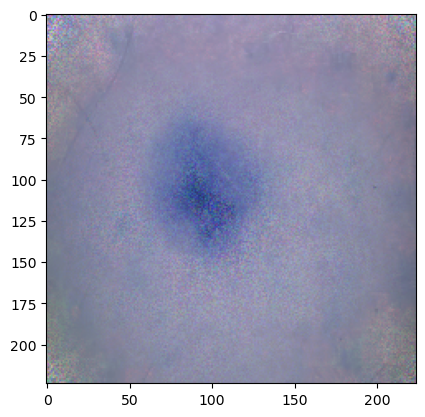

In [30]:
import matplotlib.pyplot as plt

count = 1

plt.imshow(ig)
plt.show()

In [19]:
s = Smote(sample=app, N=300, k=3)
s.over_sampling()
print(s.synthetic)

MemoryError: Unable to allocate 10.1 GiB for an array with shape (5000, 270000) and data type float64

In [5]:
import os
path="D:\\breast_cancer\\All_dataset\\train\\5"
dogs_delete=os.listdir(path)[2000:]  # Take the last 8000 images
for file_ in dogs_delete:
    os.remove(os.path.join(path, file_))

In [26]:
!pip install schedule

  Using cached schedule-1.1.0-py2.py3-none-any.whl (10 kB)


In [40]:
!pipenv install

Neither 'pyenv' nor 'asdf' could be found to install Python.
You can specify specific versions of Python with:
$ pipenv --python path\to\python


In [1]:
cd "D:\prometheus-anomaly-detector-master"

D:\prometheus-anomaly-detector-master


In [6]:
pwd

'd:\\breast_cancer'

In [2]:
%run -i app.py

2023-03-30 23:52:00,646:INFO:configuration: Metric data rolling training window size: 2 days, 23:59:59.995997
2023-03-30 23:52:00,647:INFO:configuration: Model retraining interval: 120 minutes
2023-03-30 23:52:00,842:INFO:__main__: Training models using ProcessPool of size:1
2023-03-30 23:52:00,853:INFO:__main__: Initializing Tornado Web App


AttributeError: Can't pickle local object 'Kernel.schedule_dispatch.<locals>.<lambda>'

In [3]:
!docker run --name cad -p 8080:8080 --network host --env FLT_PROM_URL=http://demo.robustperception.io:9090 --env FLT_RETRAINING_INTERVAL_MINUTES=15 --env FLT_METRICS_LIST='up' --env APP_FILE=app.py --env FLT_DATA_START_TIME=3d --env FLT_ROLLING_TRAINING_WINDOW_SIZE=15d quay.io/aicoe/prometheus-anomaly-detector:latest

---> Running application from Python script (app.py) ...


2023-03-30 19:39:02,193:INFO:configuration: Metric data rolling training window size: 14 days, 23:59:59.815496
2023-03-30 19:39:02,193:INFO:configuration: Model retraining interval: 15 minutes
2023-03-30 19:39:02,399:ERROR:prophet.plot: Importing plotly failed. Interactive plots will not work.
Traceback (most recent call last):
  File "app.py", line 39, in <module>
    model.MetricPredictor(
  File "/opt/app-root/src/model.py", line 23, in __init__
    self.metric = Metric(metric, rolling_data_window_size)
  File "/opt/app-root/lib64/python3.8/site-packages/prometheus_api_client/metric.py", line 63, in __init__
    self.metric_name = metric["metric"]["__name__"]
TypeError: 'float' object is not subscriptable


In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("D:\\breast_cancer\\DRUG\\drug.target.interaction.tsv",sep='\t')

In [3]:
data.head()

,DRUG_NAME,STRUCT_ID,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,SWISSPROT,ACT_VALUE,ACT_UNIT,ACT_TYPE,ACT_COMMENT,ACT_SOURCE,RELATION,MOA,MOA_SOURCE,ACT_SOURCE_URL,MOA_SOURCE_URL,ACTION_TYPE,TDL,ORGANISM
0,levobupivacaine,4,Potassium voltage-gated channel subfamily H me...,Ion channel,Q12809,KCNH2,KCNH2_HUMAN,4.890,NaN,IC50,Inhibition of wild-type human ERG channel expr...,CHEMBL,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
1,levobupivacaine,4,Sodium channel protein type 1 subunit alpha,Ion channel,P35498,SCN1A,SCN1A_HUMAN,5.790,NaN,IC50,NaN,WOMBAT-PK,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
2,levobupivacaine,4,Sodium channel protein type 4 subunit alpha,Ion channel,P35499,SCN4A,SCN4A_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,1.0,CHEMBL,NaN,https://www.ebi.ac.uk/chembl/compound/inspect/...,BLOCKER,Tclin,Homo sapiens
3,levobupivacaine,4,Prostaglandin E2 receptor EP1 subtype,GPCR,P34995,PTGER1,PE2R1_HUMAN,NaN,NaN,NaN,NaN,WOMBAT-PK,NaN,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens
4,levobupivacaine,4,Cytochrome P450 2D6,Enzyme,P10635,CYP2D6,CP2D6_HUMAN,6.707,NaN,IC50,"DRUGMATRIX: CYP450, 2D6 enzyme inhibition (sub...",DRUG MATRIX,=,NaN,NaN,NaN,NaN,NaN,Tclin,Homo sapiens


In [4]:
data=data.drop(columns=['STRUCT_ID','SWISSPROT','ACT_VALUE','ACT_TYPE','ACT_UNIT','ACT_COMMENT','ACT_SOURCE','RELATION','MOA','MOA_SOURCE','ACT_SOURCE_URL','MOA_SOURCE_URL','ACTION_TYPE','TDL'])

In [5]:
data['TARGET_NAME'].nunique()

2167

In [6]:
data['DRUG_NAME'].nunique()

2587

In [7]:
data.count()

DRUG_NAME       19378
TARGET_NAME     19378
TARGET_CLASS    19378
ACCESSION       19378
GENE            18962
ORGANISM        19378
dtype: int64

In [8]:
df=pd.read_csv("D:\\breast_cancer\\DRUG\\drug_names.tsv",sep='\t')
df.head()

,CID,DRUG_NAME
0,CID100000085,carnitine
1,CID100000119,gamma-aminobutyric
2,CID100000137,5-aminolevulinic
3,CID100000143,leucovorin
4,CID100000146,5-methyltetrahydrofolate


In [9]:
df.count()

CID          1430
DRUG_NAME    1430
dtype: int64

In [10]:
df_final= pd.merge(data,df,on='DRUG_NAME')
# df_final=pd.concat([data, df], axis=1, join='inner')

In [11]:
df_final.count()

DRUG_NAME       10893
TARGET_NAME     10893
TARGET_CLASS    10893
ACCESSION       10893
GENE            10655
ORGANISM        10893
CID             10893
dtype: int64

In [12]:
df_final.isnull().any()

DRUG_NAME       False
TARGET_NAME     False
TARGET_CLASS    False
ACCESSION       False
GENE             True
ORGANISM        False
CID             False
dtype: bool

In [13]:
df_final['TARGET_NAME'].nunique()

1511

In [14]:
df_final.count()

DRUG_NAME       10893
TARGET_NAME     10893
TARGET_CLASS    10893
ACCESSION       10893
GENE            10655
ORGANISM        10893
CID             10893
dtype: int64

In [15]:
dxf=pd.read_csv("D:\\breast_cancer\\DRUG\\meddra_all_se.tsv",sep='\t')

In [16]:
dxf.head()

,CID,CID2,ATC,ST,ATC2,SIDE_EFFECT
0,CID100000085,CID000010917,C0000729,LLT,C0000729,Abdominal cramps
1,CID100000085,CID000010917,C0000729,PT,C0000737,Abdominal pain
2,CID100000085,CID000010917,C0000737,LLT,C0000737,Abdominal pain
3,CID100000085,CID000010917,C0000737,PT,C0687713,Gastrointestinal pain
4,CID100000085,CID000010917,C0000737,PT,C0000737,Abdominal pain


In [17]:
dff=pd.read_csv("D:\\breast_cancer\\DRUG\\meddra_all_se.tsv",sep='\t')
dff=dff.drop(columns=['ST','CID2','ATC','ATC2'])

In [18]:
dff.count()

CID            309849
SIDE_EFFECT    309849
dtype: int64

In [19]:
df2=pd.merge(df_final,dff,on='CID')

In [20]:
df2

,DRUG_NAME,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,ORGANISM,CID,SIDE_EFFECT
0,abacavir,Gag-Pol polyprotein,Polyprotein,P03369,gag-pol,Human immunodeficiency virus type 1 group M su...,CID100001971,Abdominal pain
1,abacavir,Gag-Pol polyprotein,Polyprotein,P03369,gag-pol,Human immunodeficiency virus type 1 group M su...,CID100001971,Gastrointestinal pain
2,abacavir,Gag-Pol polyprotein,Polyprotein,P03369,gag-pol,Human immunodeficiency virus type 1 group M su...,CID100001971,Abdominal pain
3,abacavir,Gag-Pol polyprotein,Polyprotein,P03369,gag-pol,Human immunodeficiency virus type 1 group M su...,CID100001971,Lactic acidosis
4,abacavir,Gag-Pol polyprotein,Polyprotein,P03369,gag-pol,Human immunodeficiency virus type 1 group M su...,CID100001971,Lactic acidosis
...,...,...,...,...,...,...,...,...
3523077,ustekinumab,Interleukin-23,Cytokine,P29460|Q9NPF7,IL12B|IL23A,Homo sapiens,CID100121749,Tooth infection
3523078,ustekinumab,Interleukin-23,Cytokine,P29460|Q9NPF7,IL12B|IL23A,Homo sapiens,CID100121749,Oropharyngeal pain
3523079,ustekinumab,Interleukin-23,Cytokine,P29460|Q9NPF7,IL12B|IL23A,Homo sapiens,CID100121749,Oropharyngeal pain
3523080,ustekinumab,Interleukin-23,Cytokine,P29460|Q9NPF7,IL12B|IL23A,Homo sapiens,CID100121749,Posterior reversible encephalopathy syndrome


In [21]:
df2.count()

DRUG_NAME       3523082
TARGET_NAME     3523082
TARGET_CLASS    3523082
ACCESSION       3523082
GENE            3457199
ORGANISM        3523082
CID             3523082
SIDE_EFFECT     3523082
dtype: int64

In [22]:
df2.isnull().any()

DRUG_NAME       False
TARGET_NAME     False
TARGET_CLASS    False
ACCESSION       False
GENE             True
ORGANISM        False
CID             False
SIDE_EFFECT     False
dtype: bool

In [41]:
import re

In [23]:
df_test=df2[df2['TARGET_NAME'].str.contains('Adenosine')]

In [24]:
df_test

,DRUG_NAME,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,ORGANISM,CID,SIDE_EFFECT
14602,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Anaphylactic shock
14603,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Anaphylactic shock
14604,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Angioedema
14605,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Angioedema
14606,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Apnoea
...,...,...,...,...,...,...,...,...
3486338,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Posterior reversible encephalopathy syndrome
3486339,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Vestibular toxicity
3486340,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Ototoxicity
3486341,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Visual impairment


In [25]:
df_test.count()

DRUG_NAME       27787
TARGET_NAME     27787
TARGET_CLASS    27787
ACCESSION       27787
GENE            27787
ORGANISM        27787
CID             27787
SIDE_EFFECT     27787
dtype: int64

In [27]:
df_test=df_test.drop_duplicates()

In [28]:
df_test.count()

DRUG_NAME       14750
TARGET_NAME     14750
TARGET_CLASS    14750
ACCESSION       14750
GENE            14750
ORGANISM        14750
CID             14750
SIDE_EFFECT     14750
dtype: int64

In [29]:
df_test

,DRUG_NAME,TARGET_NAME,TARGET_CLASS,ACCESSION,GENE,ORGANISM,CID,SIDE_EFFECT
14602,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Anaphylactic shock
14604,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Angioedema
14606,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Apnoea
14608,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Arrhythmia
14610,adenosine,Adenosine receptor A2a,GPCR,P29274,ADORA2A,Homo sapiens,CID100000191,Asthenia
...,...,...,...,...,...,...,...,...
3486333,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Thrombotic microangiopathy
3486335,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Metastatic neoplasm
3486337,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Posterior reversible encephalopathy syndrome
3486339,cisplatin,Adenosine receptor A3,GPCR,P0DMS8,ADORA3,Homo sapiens,CID100002767,Vestibular toxicity
